In [1]:
import torch
import clip
from PIL import Image

import os
import skimage
import matplotlib.pyplot as plt

from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

In [2]:
name = 'astronaut'

filename = name + '.png'
descriptions = {
    "page": "a page of text about segmentation",
    "chelsea": "a facial photo of a tabby cat",
    "astronaut": "a portrait of an astronaut with the American flag",
    "rocket": "a rocket standing on a launchpad",
    "motorcycle_right": "a red motorcycle standing in a garage",
    "camera": "a person looking at a camera on a tripod",
    "horse": "a black-and-white silhouette of a horse", 
    "coffee": "a cup of coffee on a saucer"
}

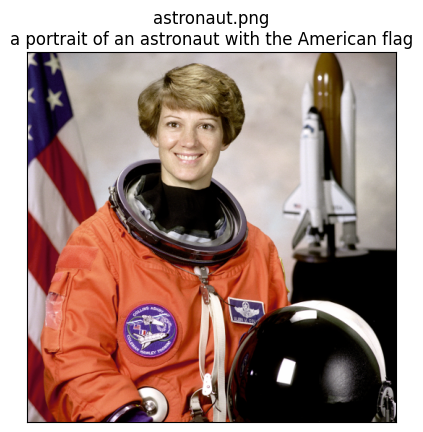

In [13]:
rgb_image = Image.open(os.path.join(skimage.data_dir, filename)).convert("RGB")
plt.imshow(rgb_image);
plt.title(f"{filename}\n{descriptions[name]}");
plt.xticks([]);
plt.yticks([]);

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
# model, preprocess = clip.load("ViT-B/32", device = device)
model, preprocess = clip.load("RN50", device = device)

In [41]:
image = preprocess(Image.open(os.path.join(skimage.data_dir, filename))).unsqueeze(0).to(device)
# text = clip.tokenize(["a diagram", "a dog", "a cat", descriptions[name]]).to(device)
text = clip.tokenize([descriptions[name]]).to(device)

In [42]:
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()
print("Label probs:", probs)

Label probs: [[1.]]


In [43]:
target_layers = [model.visual.layer4]
cam = GradCAM(model = model.visual, target_layers = target_layers)

In [44]:
i = 1023
grayscale_cam = cam(input_tensor = image, targets = [ClassifierOutputTarget(i)])

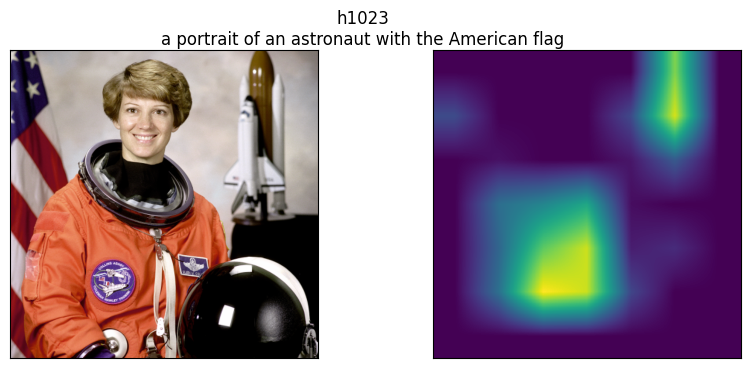

In [45]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
fig.suptitle(f"h{i}\n{descriptions[name]}")
ax[0].imshow(rgb_image);
ax[0].set_xticks([]);
ax[0].set_yticks([]);

ax[1].imshow(grayscale_cam[0, :, :]);
ax[1].set_xticks([]);
ax[1].set_yticks([]);

In [ ]:
for i in range(5):
    grayscale_cam = cam(input_tensor = image, targets = [ClassifierOutputTarget(i)])

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
    fig.suptitle(f"h{i}\n{descriptions[name]}")
    ax[0].imshow(rgb_image);
    ax[0].set_xticks([]);
    ax[0].set_yticks([]);

    ax[1].imshow(grayscale_cam[0, :, :]);
    ax[1].set_xticks([]);
    ax[1].set_yticks([]);